In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

## Define Scatter Function 

In [48]:
def scatter_it(dataframe, hue_metric ='correct.', title='', model='Dense', show_hist=False, save_dir='logs/mnist/'):
    # Subsample data to plot, so the plot is not too busy.
    # dataframe = dataframe.sample(n=25000 if dataframe.shape[0] > 25000 else len(dataframe))
    
    # Normalize correctness to a value between 0 and 1.
    dataframe = dataframe.assign(corr_frac = lambda d: d.correctness / d.correctness.max())
    dataframe['correct.'] = [f"{x:.1f}" for x in dataframe['corr_frac']]
    dataframe = dataframe.sort_values(by=[hue_metric])
    main_metric = 'variability'
    other_metric = 'confidence'
    
    hue = hue_metric
    num_hues = len(dataframe[hue].unique().tolist())
    print('num_hues: ', num_hues)
    style = hue_metric
    # style = hue_metric if num_hues < 8 else None

    if not show_hist:
        fig, axs = plt.subplots(1, 1, figsize=(8, 4))
        ax0 = axs
    else:
        fig = plt.figure(figsize=(16, 10), )
        gs = fig.add_gridspec(2, 3, height_ratios=[5, 1])
    
        ax0 = fig.add_subplot(gs[0, :])
    
    
    ### Make the scatterplot.
    
    # Choose a palette.
    pal = sns.diverging_palette(260, 15, n=num_hues, sep=10, center="dark")

    plot = sns.scatterplot(x=main_metric,
                           y=other_metric,
                           ax=ax0,
                           data=dataframe,
                           hue=hue,
                           palette=pal,
                           style=style,
                           s=30)
    
    # Annotate Regions.
    bb = lambda c: dict(boxstyle="round,pad=0.3", ec=c, lw=2, fc="white")
    an1 = ax0.annotate("ambiguous", xy=(0.9, 0.5), xycoords="axes fraction", fontsize=15, color='black',
                  va="center", ha="center", rotation=350, bbox=bb('black'))
    an2 = ax0.annotate("easy-to-learn", xy=(0.27, 0.85), xycoords="axes fraction", fontsize=15, color='black',
                  va="center", ha="center", bbox=bb('r'))
    an3 = ax0.annotate("hard-to-learn", xy=(0.35, 0.25), xycoords="axes fraction", fontsize=15, color='black',
                  va="center", ha="center", bbox=bb('b'))
    
    if not show_hist:
        plot.legend(ncol=1, bbox_to_anchor=(1.01, 0.5), loc='center left', fancybox=True, shadow=True)
    else:
        plot.legend(fancybox=True, shadow=True,  ncol=1)
    plot.set_xlabel('variability')
    plot.set_ylabel('confidence')
    
    if show_hist:
        plot.set_title(f"{model}-{title} Data Map", fontsize=17)
        
        # Make the histograms.
        ax1 = fig.add_subplot(gs[1, 0])
        ax2 = fig.add_subplot(gs[1, 1])
        ax3 = fig.add_subplot(gs[1, 2])

        plott0 = dataframe.hist(column=['confidence'], ax=ax1, color='#622a87')
        plott0[0].set_title('')
        plott0[0].set_xlabel('confidence')
        plott0[0].set_ylabel('density')

        plott1 = dataframe.hist(column=['variability'], ax=ax2, color='teal')
        plott1[0].set_title('')
        plott1[0].set_xlabel('variability')

        plot2 = sns.countplot(x="correct.", data=dataframe, color='#86bf91', ax=ax3)
        ax3.xaxis.grid(True) # Show the vertical gridlines

        plot2.set_title('')
        plot2.set_xlabel('correctness')
        plot2.set_ylabel('')

    fig.tight_layout()
    filename = f'{save_dir}{title}_{model}.pdf' if show_hist else f'{save_dir}/compact_{title}_{model}.pdf'
    fig.savefig(filename, dpi=300)

# MNIST

## ORIGINAL

### Load Cartography Logs of Dataset

In [36]:
# read data frame
mnist_df = pd.read_pickle("/home/mj-haghighi/Repositories/Anomaly-Detection/logs/mnist-org/mnist/cartography.pkl")

In [37]:
mnist_df.head()

,NAME,confidence,variability,correctness
0,42867.png,0.955441,0.194220,19
1,36205.png,0.955380,0.194493,19
2,41184.png,0.954793,0.194578,19
3,50915.png,0.955187,0.195210,19
4,49518.png,0.955798,0.191590,19


### Plot Data Map

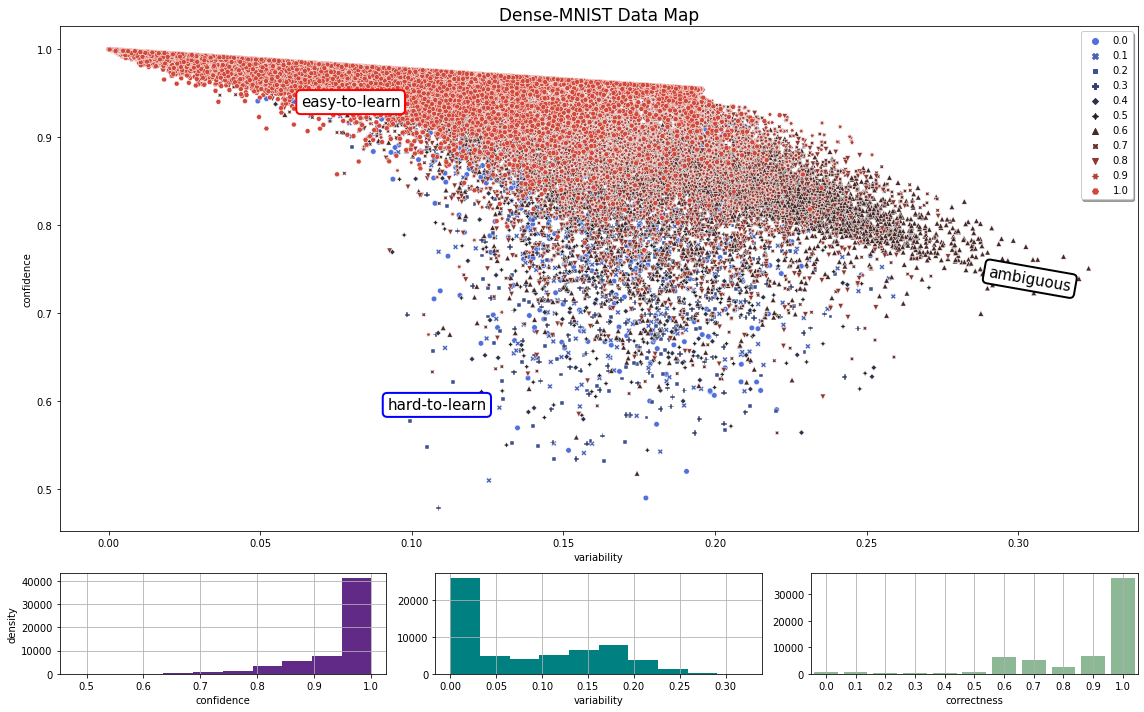

In [38]:
scatter_it(mnist_df, title='MNIST', show_hist=True, save_dir='logs/mnist-org/mnist/')

## With 3% noise

### Load Cartography Logs of Dataset

In [55]:
# read data frame
mnist_df = pd.read_pickle("logs/mnist-3-noisy/mnist/cartography.pkl")

In [56]:
mnist_df.head()

,NAME,confidence,variability,correctness
0,8439.png,0.653657,0.197251,0
1,wrong_4_34389.png,0.953251,0.193233,0
2,34127.png,0.955520,0.193846,20
3,9343.png,0.955488,0.193985,19
4,9363.png,0.955449,0.194131,19


### Plot Data Map

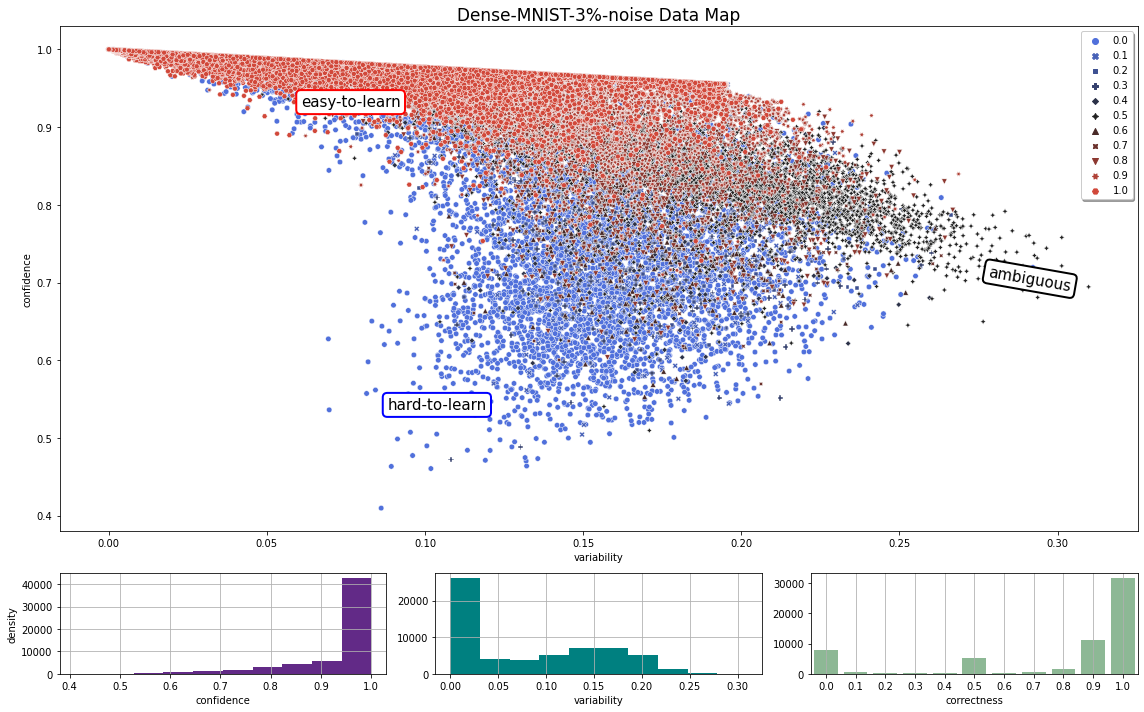

In [35]:
scatter_it(mnist_df, title='MNIST-3%-noise', show_hist=True, save_dir='logs/mnist-org/mnist/')

### plot position of wrong labels

In [61]:
def seperate_wrong(row):  
    if row['NAME'].startswith('wrong'):
        return 1
    return 0
mnist_df['wrongs'] = mnist_df.apply(lambda row: seperate_wrong(row), axis=1)

In [59]:
print(mnist_df.sort_values(by='NAME', ascending=False).head())

                   NAME  confidence  variability  correctness  wrongs
58654  wrong_9_9728.png    0.743421     0.195958            0       0
40841  wrong_9_9447.png    0.649522     0.121315            0       0
37608  wrong_9_9394.png    0.811801     0.148425            0       0
11916  wrong_9_8356.png    0.697165     0.166601            6       0
5749   wrong_9_8165.png    0.702121     0.200227            0       0


num_hues:  2


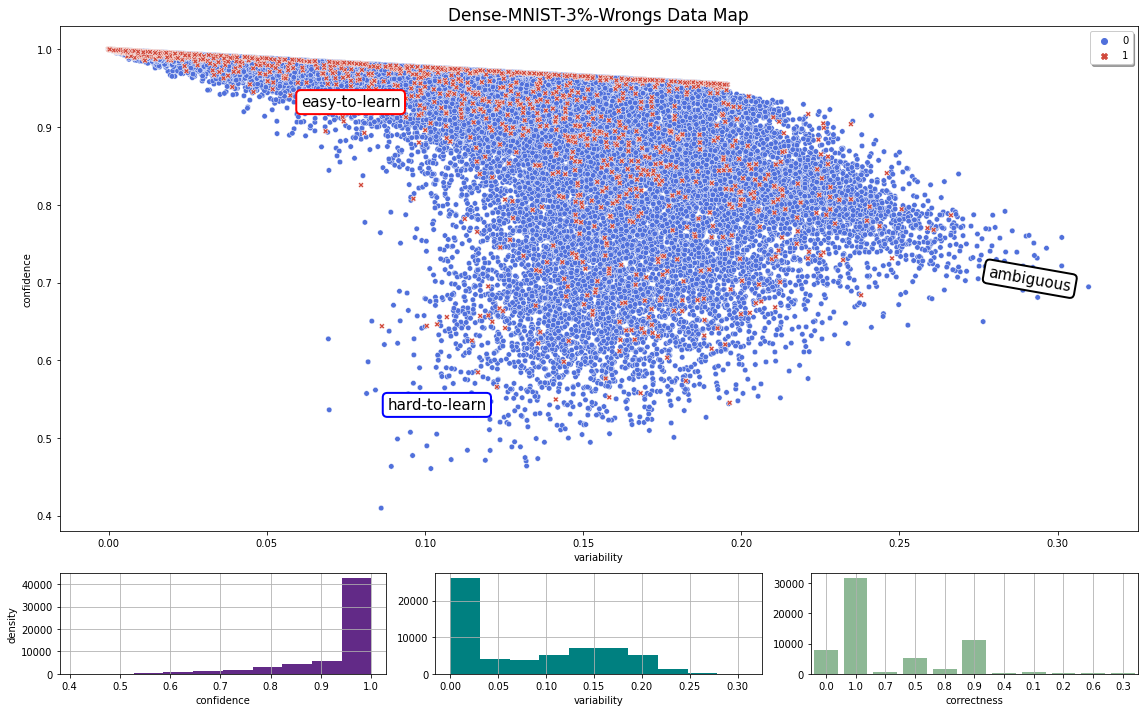

In [62]:
scatter_it(mnist_df, title='MNIST-3%-Wrongs', hue_metric='wrongs', show_hist=True, save_dir='logs/mnist-org/mnist/')

## With 1% noise

### Load Cartography Logs of Dataset

In [63]:
# read data frame
mnist_df = pd.read_pickle("logs/mnist-1-noisy/cartography.pkl")

In [64]:
mnist_df.head()

,NAME,confidence,variability,correctness
0,33364.png,0.789500,0.255145,13
1,49716.png,0.955140,0.192597,19
2,45493.png,0.449072,0.328097,0
3,54271.png,0.955608,0.193498,19
4,3428.png,0.955307,0.194513,19


### Plot Data Map

num_hues:  11


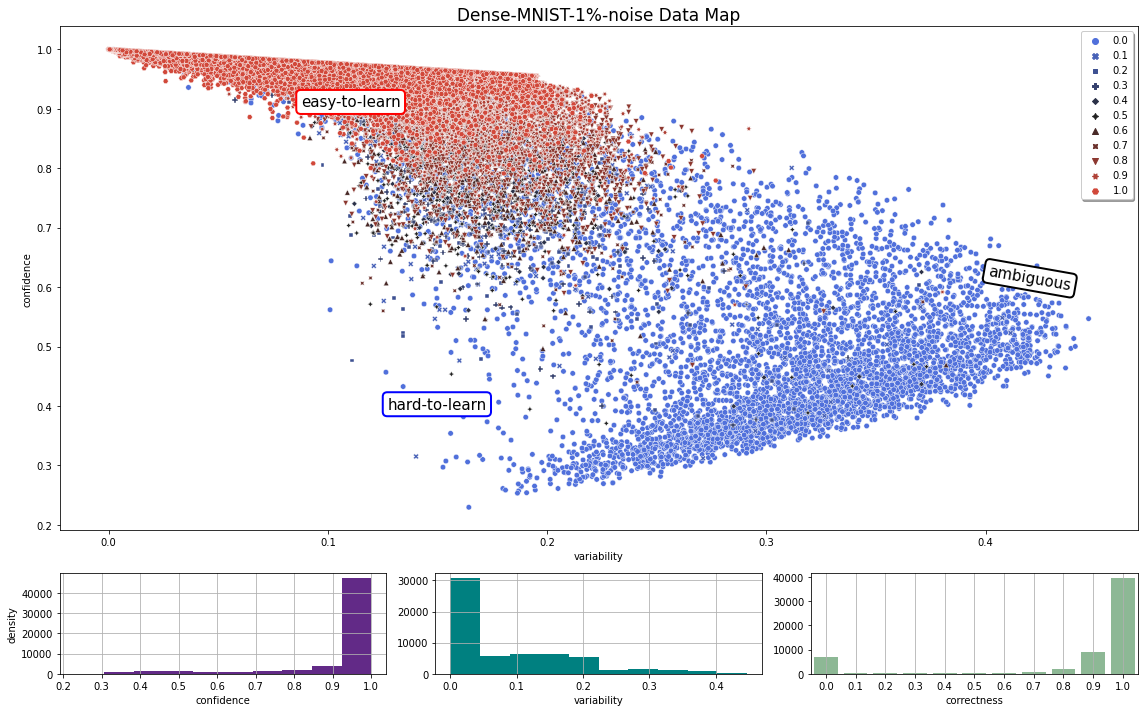

In [65]:
scatter_it(mnist_df, title='MNIST-1%-noise', show_hist=True, save_dir='logs/mnist-1-noisy/')

### plot position of wrong labels

In [66]:
def seperate_wrong(row):  
    if row['NAME'].startswith('wrong'):
        return 1
    return 0
mnist_df['wrongs'] = mnist_df.apply(lambda row: seperate_wrong(row), axis=1)

In [ ]:
print(mnist_df.sort_values(by='NAME', ascending=False).head())

                   NAME  confidence  variability  correctness  wrongs
58654  wrong_9_9728.png    0.743421     0.195958            0       0
40841  wrong_9_9447.png    0.649522     0.121315            0       0
37608  wrong_9_9394.png    0.811801     0.148425            0       0
11916  wrong_9_8356.png    0.697165     0.166601            6       0
5749   wrong_9_8165.png    0.702121     0.200227            0       0


num_hues:  2


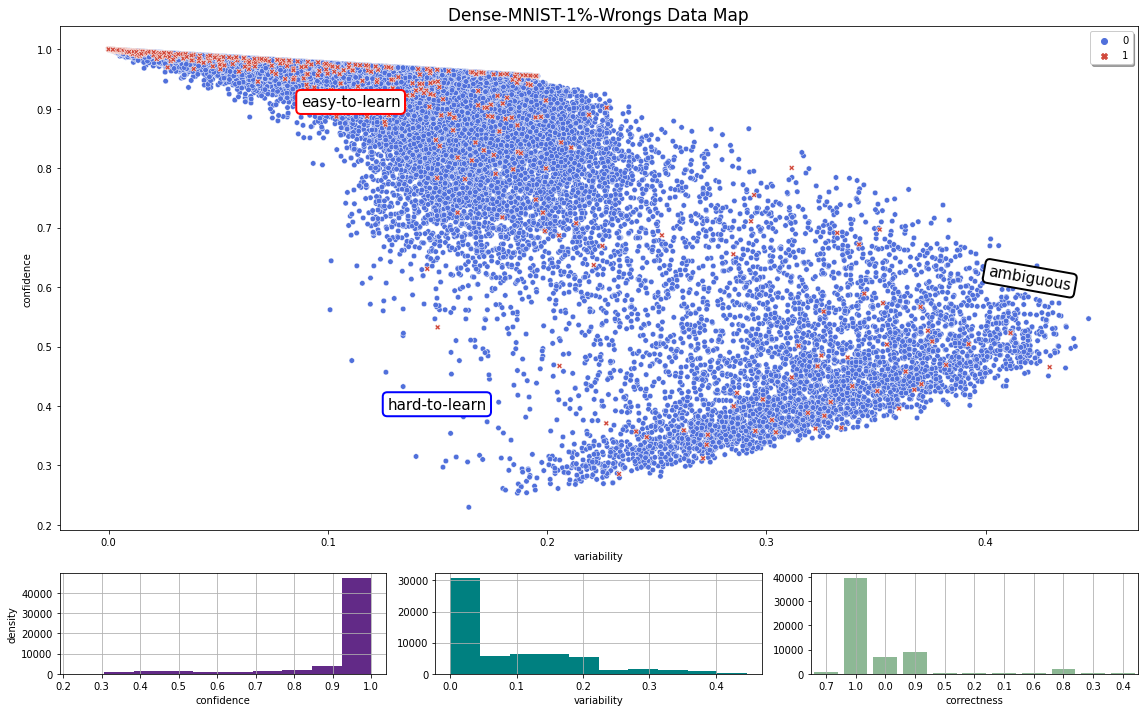

In [68]:
scatter_it(mnist_df, title='MNIST-1%-Wrongs', hue_metric='wrongs', show_hist=True, save_dir='logs/mnist-org/mnist/')

## With 0.1% noise

### Load Cartography Logs of Dataset

In [69]:
# read data frame
mnist_df = pd.read_pickle("logs/mnist-0.1-noisy/cartography.pkl")

In [70]:
mnist_df.head()

,NAME,confidence,variability,correctness
0,46019.png,0.954772,0.193370,19
1,2349.png,0.669840,0.364856,0
2,19696.png,0.946870,0.193190,19
3,18326.png,0.945842,0.193311,19
4,52981.png,0.813326,0.196348,4


### Plot Data Map

num_hues:  11


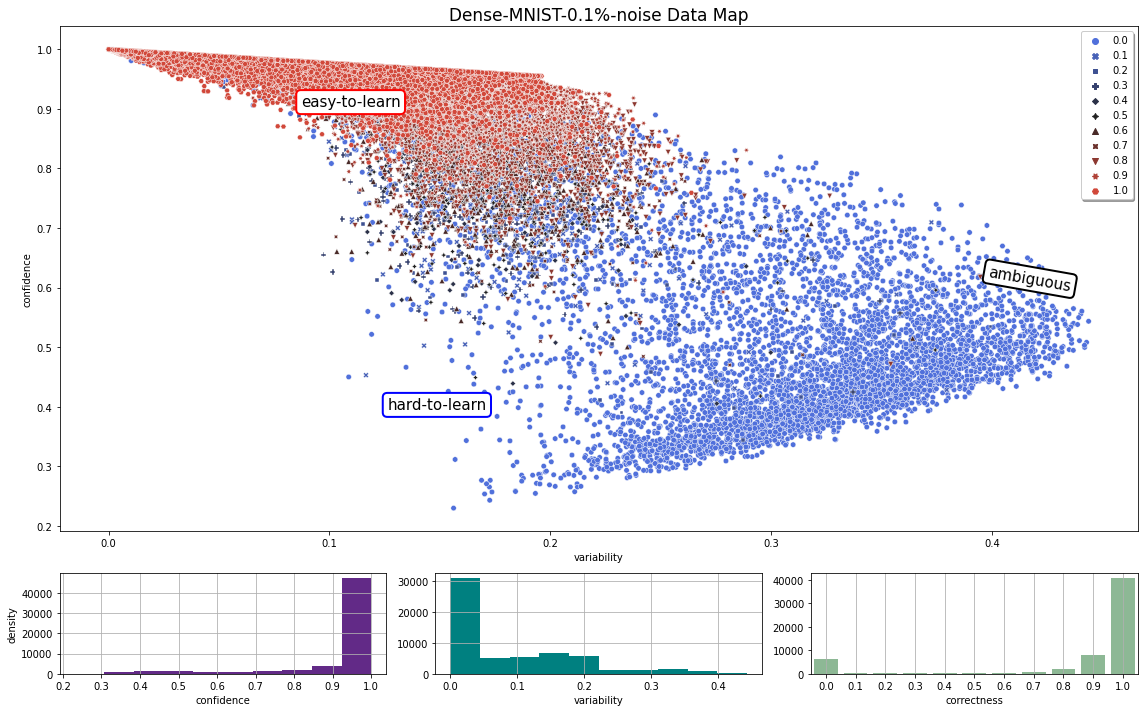

In [72]:
scatter_it(mnist_df, title='MNIST-0.1%-noise', show_hist=True, save_dir='logs/mnist-0.1-noisy')

### plot position of wrong labels

In [73]:
def seperate_wrong(row):  
    if row['NAME'].startswith('wrong'):
        return 1
    return 0
mnist_df['wrongs'] = mnist_df.apply(lambda row: seperate_wrong(row), axis=1)

In [74]:
print(mnist_df.sort_values(by='NAME', ascending=False).head())

                    NAME  confidence  variability  correctness  wrongs
41279  wrong_9_55477.png    0.999569     0.000913            0       1
38066  wrong_9_39692.png    0.994191     0.011467            0       1
41612  wrong_9_25258.png    0.998703     0.003044            0       1
52501  wrong_9_15746.png    0.995782     0.009394            0       1
1799   wrong_9_11208.png    0.820918     0.229105            4       1


num_hues:  2


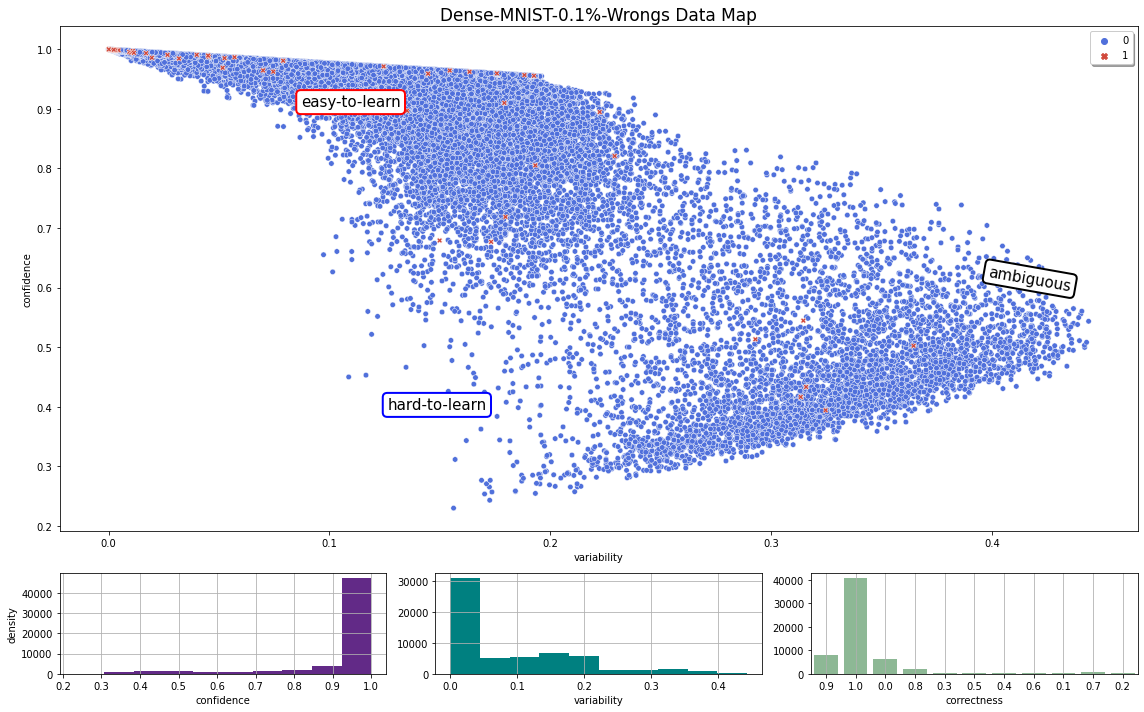

In [75]:
scatter_it(mnist_df, title='MNIST-0.1%-Wrongs', hue_metric='wrongs', show_hist=True, save_dir='logs/mnist-0.1-noisy')